# Creating NLP Pipeline

## Importing NLTK libraries

In [1]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

## Initializing Objects

In [2]:
# init Objects
tokenizer=RegexpTokenizer(r'\w+')
en_stopwords=set(stopwords.words('english'))
ps=PorterStemmer()

## Tokenizing, Stemming and Removing Stopwords 

In [3]:
def getStemmedReview(review):
    review=review.lower()
    
    #Tokenize
    tokens=tokenizer.tokenize(review)
    new_tokens=[token for token in tokens if token not in en_stopwords]
    stemmed_tokens=[ps.stem(token) for token in new_tokens]
    clean_review=' '.join(stemmed_tokens)
    return clean_review

## Stemming function for complete Data

In [4]:
def getStemmedDoc(inputFile,outputFile):
    out=open(outputFile,'w',encoding="utf8")
    with open(inputFile,encoding="utf8") as f:
        reviews=f.readlines()
    for review in reviews:
        cleaned_review=getStemmedReview(review)
        print((cleaned_review),file=out)
    out.close()
    

## Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Reading Data and making X,y on 30K rows

In [6]:
df=pd.read_csv("Data.csv")
df=df.head(n=30000)

In [7]:
X=df['review'].values
y=df['label'].values

## Encoding Target Variable as it's in form of pos(+) and neg(-)

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
y.shape

(30000,)

## Train Test Split with Ratio of 20%

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.20)
y_test.shape

(6000,)

## Cleaning Training data

In [10]:
X_train_clean=[getStemmedReview(i) for i in X_train]


## Vectorizing Training data

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer() ##We can use bigrams and trigrams 
cv.fit(X_train_clean)
X_train_vec=cv.transform(X_train_clean).toarray()
print(X_train_vec)
print(X_train_vec.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(24000, 52541)


## Applying Multinomial Naive Bayes

In [12]:
from sklearn.naive_bayes import MultinomialNB

In [13]:
mnb=MultinomialNB()
mnb.fit(X_train_vec,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Cleaning Test Data

In [14]:
X_test_clean=[getStemmedReview(i) for i in X_test]


## Vectorizing Test Data

In [15]:
X_test_vec=cv.transform(X_test_clean).toarray()
print(X_test_vec)
print(X_test_vec.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(6000, 52541)


## Making Predictions on Test Data

In [16]:
y_test_pred=mnb.predict(X_test_vec)

## Checking score

In [18]:
print(mnb.score(X_test_vec,y_test))

0.8541666666666666


## Visualizing Confusion Matrix

In [19]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax



## Importing libraries

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

Confusion matrix, without normalization
[[2648  377]
 [ 498 2477]]


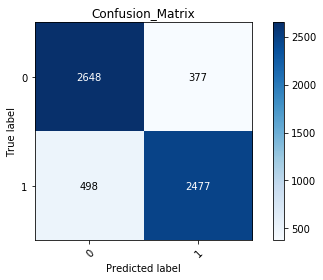

In [29]:
class_labels=np.array([0,1])
plot_confusion_matrix(y_test,y_test_pred,classes=class_labels,
                          normalize=False,
                          title="Confusion_Matrix",
                          cmap=plt.cm.Blues)
plt.show()